# Exercise 5 - Neural Networks (Feed Forwarding)

**NOTE: The example and sample data is being taken from the "Machine Learning course by Andrew Ng" in Coursera.**

In the previous Example 4, we implemented multi-class logistic regression to recognize handwritten digits. However, logistic regression cannot form more complex hypotheses as it is only a linear classifier. 

In this Example, we will implement a neural network to recognize handwritten digits using the same training set as before. The neural network will be able to represent complex models that form non-linear hypotheses. For this Example, we will be using parameters from a neural network that we have already trained. Our goal is to implement the feedforward propagation algorithm to use our weights for prediction. In next Example, we will write the backpropagation algorithm for learning the neural network parameters.

## Model representation
Our neural network is shown in Figure 2. It has 3 layers – an input layer, a
hidden layer and an output layer. Recall that our inputs are pixel values of
digit images. Since the images are of size 20×20, this gives us 400 input layer
units (excluding the extra bias unit which always outputs +1). As before,
the training data will be loaded into the variables X and y.
You have been provided with a set of network parameters (Θ(1) , Θ(2))
already trained by us. These are stored in ex3weights.mat and will be
loaded by scipy.io into Theta1 and Theta2 The parameters have dimensions
that are sized for a neural network with 25 units in the second layer and 10
output units (corresponding to the 10 digit classes).

<img src='data/nn.jpg'>

In [1]:
# initial imports
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# imports from my models
from models.data_preprocessing import add_bias_unit
from models.logistic_regression import cost_function, predict, gradient_descent, gradient_function, sigmoid

### =========== Part 1: Loading and Visualizing Data =============
We start the exercise by first loading and visualizing the dataset.

We will be working with a dataset that contains handwritten digits.

In [3]:
# loading dataset
import scipy.io as sio  # sio for loading matlab file .mat
data = sio.loadmat('data/ex3data1.mat')
X = data['X']
y = data['y']
y[y==10] = 0 # mapping zeroes in y to 0

In [4]:
# setting up variables we will be using for this example
input_layer_size  = 400  # 20x20 Input Images of Digits
hidden_layer_size = 25   # 25 hidden units
num_labels = 10          # 10 labels, from 1 to 10

In [5]:
print('Loading and Visualizing Data ...')

m = X.shape[0]

print("Randomly selecting 100 data points to display")
rand_indices = np.random.choice(range(0,m), 100)
rand_samples = X[rand_indices, :]

Loading and Visualizing Data ...
Randomly selecting 100 data points to display


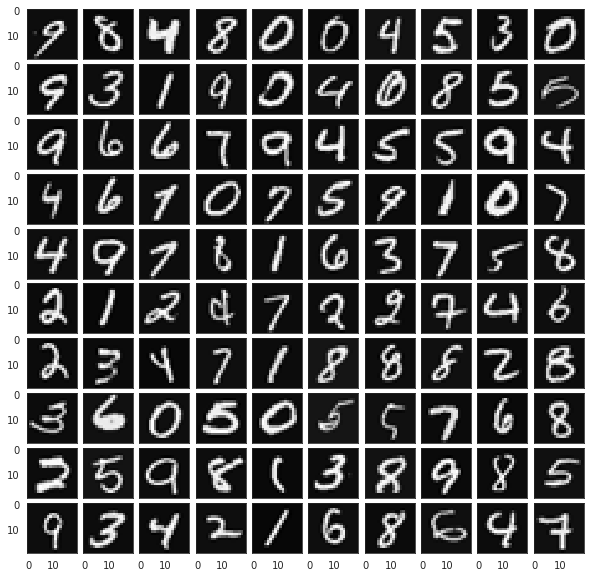

In [6]:
# displaying the 100 random samples using matplotlib
sns.set_style('white')
fig, axis = plt.subplots(10,10,sharex=True, sharey=True, figsize=(10,10))
fig.subplots_adjust(wspace=0.1, hspace=0.1)
axis_flt = axis.flatten()
for i in range(100):
    axis_flt[i].imshow(rand_samples[i, :].reshape([20,20]).T, cmap='gray')

### ================ Part 2: Loading Pameters ================
In this part of the exercise, we load some pre-initialized neural network parameters.

In [7]:
print('Loading Saved Neural Network Parameters ...')

# Load the weights into variables Theta1 and Theta2
weights = sio.loadmat('data/ex3weights.mat')
theta1 = weights['Theta1']  # theta1 = numpy array of shape 25x401
theta2 = weights['Theta2']  # theta2 = numpy array of shape 10x26

# swap first and last columns of Theta2, due to legacy from MATLAB indexing
# since the weight file ex3weights.mat was saved based on MATLAB indexing
theta2 = np.roll(theta2, 1, axis=0)

Loading Saved Neural Network Parameters ...


### ================= Part 3: Implementing Prediction =================

In [8]:
# adding bias unit to X
X = add_bias_unit(X)

# predicting layer 2
z2 = X @ theta1.T
a2 = sigmoid(z2)

# adding bias unit to a2
a2 = add_bias_unit(a2)

# predicting layer 3 (final layer)
z3 = a2 @ theta2.T
a3 = sigmoid(z3)

# the predictions of final layer are saved in a3
# now finding the index of largest prediction to get the most probable class

pred = np.argmax(a3, axis=1).reshape(m,1)
accuracy = (pred==y).astype(np.int64).mean() * 100.0
print('Accuracy of the neural network for the training set is : {:.2f}%'.format(accuracy))

Accuracy of the neural network for the training set is : 97.52%
